In [3]:
!pip install -r requirements.txt

In [4]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 8.9 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01


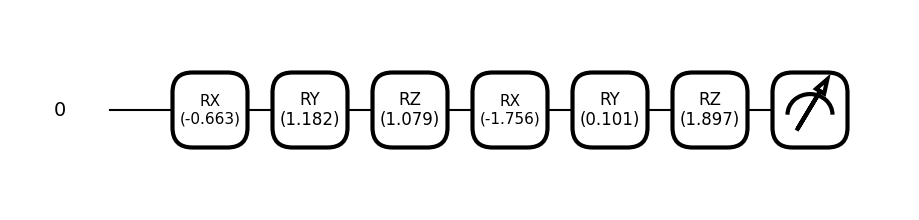

In [11]:
''' CHECK THE SET UP PRINTING THIS CIRCUIT'''
from tools import *
def vqa_gen_state(n_qubits, depht=None):
    #n_qubits = 1
    if depht == None:
        depht = n_qubits+1
    n = 3*n_qubits*(1+depht)
    params = random_params(n)
    device = qml.device('qiskit.aer', wires=n_qubits, backend='qasm_simulator')
    @qml.qnode(device, interface="torch")
    def circuit(params, M=None):
        #print(j)
        aux = 0
        for deep in range(0,depht):

            qml.RX(params[0+aux], wires=0)
            qml.RY(params[1+aux], wires=0)
            qml.RZ(params[2+aux], wires=0)
            aux += 3
        return qml.expval(qml.Hermitian(M, wires=0))
    return circuit, params
n_qubits = 1
circuit, params = vqa_gen_state(n_qubits)
target_vector, target_op = init_state_gen_state(np.pi/2,0)
#best_params, f = train(10, circuit, params, target_op)
fig, ax = qml.draw_mpl(circuit, decimals=3)(params, target_op)
plt.show()